In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

Creating Empty List for Review

In [2]:
review = []

In [1]:
for i in range(1,21):
    ip =[]
    url = 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/product-reviews/B09WQY65HN/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response = requests.get(url)
    soup = bs(response.content,'html.parser')
    reviews = soup.find_all('span', attrs={'calss', 'a-size-base review-text review-text-content'})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
        
    review = review + ip   

NameError: name 'requests' is not defined

In [4]:
review

["\nA Midrange phone from oneplus. why I choose this phone is only because of the brand value we have more other option like Vivo t1 / realme 9 /9 Pro / Oppo/ Motorola but the oneplus has their own premium feel the reason why I have given only four star.......1). The Amoled display is not there but it is not important.2) The wide angle lens is also not there.3) they have removed alert slider. Otherwise the phone is perfect I am satisfied with this device 95% you can definitely go for it. the important thing is that red cable is available which is a signature of oneplus mobile also the oxygen OS is perfect I like it and it's give extremely performance that fill you like a { Makhan Malai }.Thank you ❤️\u200d🔥\n",
 '\nNice budget phone\n',
 '\nBuild quilty good\n',
 '\nValue for money.\n',
 '\nBest phone in 19000 with good camera, decent battery, and good figer print scanner. The best thing about this phone is oxygen OS which gives you a different feeling in terms of smooth running.  Andr

# writing review in a text file

In [4]:
with open('oneplus.txt','w', encoding='utf8') as output:
    output.write(str(review))

# joining all the review in a single graph

In [5]:
re_string = ' '.join(review)

In [6]:
re_string

"\nA Midrange phone from oneplus. why I choose this phone is only because of the brand value we have more other option like Vivo t1 / realme 9 /9 Pro / Oppo/ Motorola but the oneplus has their own premium feel the reason why I have given only four star.......1). The Amoled display is not there but it is not important.2) The wide angle lens is also not there.3) they have removed alert slider. Otherwise the phone is perfect I am satisfied with this device 95% you can definitely go for it. the important thing is that red cable is available which is a signature of oneplus mobile also the oxygen OS is perfect I like it and it's give extremely performance that fill you like a { Makhan Malai }.Thank you ❤️\u200d🔥\n \nNice budget phone\n \nBuild quilty good\n \nValue for money.\n \nBest phone in 19000 with good camera, decent battery, and good figer print scanner. The best thing about this phone is oxygen OS which gives you a different feeling in terms of smooth running.  Android update level 

# Removing Unwanted Symbol

In [7]:
re_string = re.sub('[^A-Za-z'']+', ' ',re_string).lower()

# Word contain in the review

In [8]:
re_word = re_string.split(" ")

In [9]:
re_word

['',
 'a',
 'midrange',
 'phone',
 'from',
 'oneplus',
 'why',
 'i',
 'choose',
 'this',
 'phone',
 'is',
 'only',
 'because',
 'of',
 'the',
 'brand',
 'value',
 'we',
 'have',
 'more',
 'other',
 'option',
 'like',
 'vivo',
 't',
 'realme',
 'pro',
 'oppo',
 'motorola',
 'but',
 'the',
 'oneplus',
 'has',
 'their',
 'own',
 'premium',
 'feel',
 'the',
 'reason',
 'why',
 'i',
 'have',
 'given',
 'only',
 'four',
 'star',
 'the',
 'amoled',
 'display',
 'is',
 'not',
 'there',
 'but',
 'it',
 'is',
 'not',
 'important',
 'the',
 'wide',
 'angle',
 'lens',
 'is',
 'also',
 'not',
 'there',
 'they',
 'have',
 'removed',
 'alert',
 'slider',
 'otherwise',
 'the',
 'phone',
 'is',
 'perfect',
 'i',
 'am',
 'satisfied',
 'with',
 'this',
 'device',
 'you',
 'can',
 'definitely',
 'go',
 'for',
 'it',
 'the',
 'important',
 'thing',
 'is',
 'that',
 'red',
 'cable',
 'is',
 'available',
 'which',
 'is',
 'a',
 'signature',
 'of',
 'oneplus',
 'mobile',
 'also',
 'the',
 'oxygen',
 'os',
 'i

In [10]:
vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,1))

In [11]:
x = vectorizer.fit_transform(re_word)

In [12]:
stops = stopwords.words('english')

In [13]:
stops.extend(['oneplus', 'mobile', 'time', 'android', 'phone', 'device', 'product', 'day'])

In [14]:
re_word = [w for w in re_word if not w in stops]

In [15]:
re_word

['',
 'midrange',
 'choose',
 'brand',
 'value',
 'option',
 'like',
 'vivo',
 'realme',
 'pro',
 'oppo',
 'motorola',
 'premium',
 'feel',
 'reason',
 'given',
 'four',
 'star',
 'amoled',
 'display',
 'important',
 'wide',
 'angle',
 'lens',
 'also',
 'removed',
 'alert',
 'slider',
 'otherwise',
 'perfect',
 'satisfied',
 'definitely',
 'go',
 'important',
 'thing',
 'red',
 'cable',
 'available',
 'signature',
 'also',
 'oxygen',
 'os',
 'perfect',
 'like',
 'give',
 'extremely',
 'performance',
 'fill',
 'like',
 'makhan',
 'malai',
 'thank',
 'nice',
 'budget',
 'build',
 'quilty',
 'good',
 'value',
 'money',
 'best',
 'good',
 'camera',
 'decent',
 'battery',
 'good',
 'figer',
 'print',
 'scanner',
 'best',
 'thing',
 'oxygen',
 'os',
 'gives',
 'different',
 'feeling',
 'terms',
 'smooth',
 'running',
 'update',
 'level',
 'amazing',
 'best',
 'deal',
 'camera',
 'decent',
 'finger',
 'print',
 'reader',
 'responsive',
 'battery',
 'life',
 'good',
 'one',
 'price',
 'range',

In [16]:
# join all the review into single graph
ip_re = " ".join(re_word)

In [17]:
ip_re

' midrange choose brand value option like vivo realme pro oppo motorola premium feel reason given four star amoled display important wide angle lens also removed alert slider otherwise perfect satisfied definitely go important thing red cable available signature also oxygen os perfect like give extremely performance fill like makhan malai thank nice budget build quilty good value money best good camera decent battery good figer print scanner best thing oxygen os gives different feeling terms smooth running update level amazing best deal camera decent finger print reader responsive battery life good one price range compromise comparison high end processor camera quality features good single sim good battery backup good camera quality good fingerprint reader nice overall good value money like good heating good finger print battery good camera quality good canvas aod mood available battry performance also good always getting error scree currently receiving screen available previously faci

# Generating WordCloud

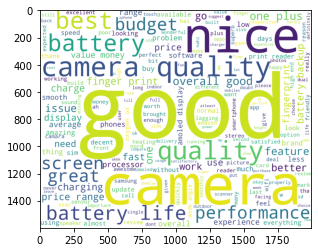

In [18]:
wordcloud_ip = WordCloud(background_color='White', width=2000, height=1600).generate(ip_re)
plt.imshow(wordcloud_ip)

Positive words

In [19]:
with open('/home/ataur/Downloads/positive-words.txt') as pos:
    pos_word = pos.read().split('\n')

# positive word cloud
# choosing only posoitve word 

In [20]:
ip_pos = ' '.join([w for w in re_word if w in pos_word])

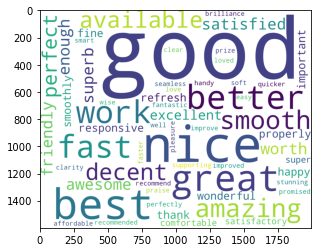

In [21]:
pos_wordcloud = WordCloud(background_color='White', width=2000, height=1600).generate(ip_pos)
plt.imshow(pos_wordcloud)

# Negative Word

In [22]:
with open('/home/ataur/Downloads/negative-words.txt') as neg:
    negword = neg.read().split('\n')

# Negative WordCloud

In [23]:
ip_neg = ' '.join([w for w in re_word if w in negword])

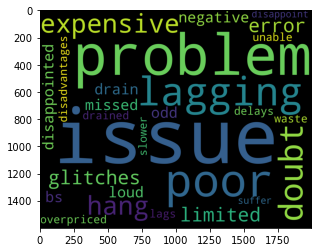

In [24]:
neg_wordcloud = WordCloud(background_color='Black', width=2000, height=1600).generate(ip_neg)
plt.imshow(neg_wordcloud)

Bigram

In [25]:
bigram_list = list(nltk.bigrams(re_word))
bigram_list

[('', 'midrange'),
 ('midrange', 'choose'),
 ('choose', 'brand'),
 ('brand', 'value'),
 ('value', 'option'),
 ('option', 'like'),
 ('like', 'vivo'),
 ('vivo', 'realme'),
 ('realme', 'pro'),
 ('pro', 'oppo'),
 ('oppo', 'motorola'),
 ('motorola', 'premium'),
 ('premium', 'feel'),
 ('feel', 'reason'),
 ('reason', 'given'),
 ('given', 'four'),
 ('four', 'star'),
 ('star', 'amoled'),
 ('amoled', 'display'),
 ('display', 'important'),
 ('important', 'wide'),
 ('wide', 'angle'),
 ('angle', 'lens'),
 ('lens', 'also'),
 ('also', 'removed'),
 ('removed', 'alert'),
 ('alert', 'slider'),
 ('slider', 'otherwise'),
 ('otherwise', 'perfect'),
 ('perfect', 'satisfied'),
 ('satisfied', 'definitely'),
 ('definitely', 'go'),
 ('go', 'important'),
 ('important', 'thing'),
 ('thing', 'red'),
 ('red', 'cable'),
 ('cable', 'available'),
 ('available', 'signature'),
 ('signature', 'also'),
 ('also', 'oxygen'),
 ('oxygen', 'os'),
 ('os', 'perfect'),
 ('perfect', 'like'),
 ('like', 'give'),
 ('give', 'extremely

In [26]:
d1 = [' '.join(tup) for tup in bigram_list]

In [27]:
d1

[' midrange',
 'midrange choose',
 'choose brand',
 'brand value',
 'value option',
 'option like',
 'like vivo',
 'vivo realme',
 'realme pro',
 'pro oppo',
 'oppo motorola',
 'motorola premium',
 'premium feel',
 'feel reason',
 'reason given',
 'given four',
 'four star',
 'star amoled',
 'amoled display',
 'display important',
 'important wide',
 'wide angle',
 'angle lens',
 'lens also',
 'also removed',
 'removed alert',
 'alert slider',
 'slider otherwise',
 'otherwise perfect',
 'perfect satisfied',
 'satisfied definitely',
 'definitely go',
 'go important',
 'important thing',
 'thing red',
 'red cable',
 'cable available',
 'available signature',
 'signature also',
 'also oxygen',
 'oxygen os',
 'os perfect',
 'perfect like',
 'like give',
 'give extremely',
 'extremely performance',
 'performance fill',
 'fill like',
 'like makhan',
 'makhan malai',
 'malai thank',
 'thank nice',
 'nice budget',
 'budget build',
 'build quilty',
 'quilty good',
 'good value',
 'value money',

# Using countVectorizer to view the frequancy of bigram

In [28]:
vectorizer = CountVectorizer(ngram_range=(2,2))

In [29]:
b_word = vectorizer.fit_transform(d1)

In [30]:
vectorizer.vocabulary_

{'midrange choose': 699,
 'choose brand': 242,
 'brand value': 138,
 'value option': 1197,
 'option like': 806,
 'like vivo': 652,
 'vivo realme': 1202,
 'realme pro': 986,
 'pro oppo': 907,
 'oppo motorola': 801,
 'motorola premium': 721,
 'premium feel': 888,
 'feel reason': 395,
 'reason given': 989,
 'given four': 437,
 'four star': 414,
 'star amoled': 1108,
 'amoled display': 41,
 'display important': 310,
 'important wide': 580,
 'wide angle': 1213,
 'angle lens': 47,
 'lens also': 618,
 'also removed': 27,
 'removed alert': 998,
 'alert slider': 16,
 'slider otherwise': 1071,
 'otherwise perfect': 816,
 'perfect satisfied': 834,
 'satisfied definitely': 1019,
 'definitely go': 290,
 'go important': 446,
 'important thing': 579,
 'thing red': 1153,
 'red cable': 995,
 'cable available': 169,
 'available signature': 63,
 'signature also': 1059,
 'also oxygen': 26,
 'oxygen os': 828,
 'os perfect': 813,
 'perfect like': 833,
 'like give': 644,
 'give extremely': 435,
 'extremely p

In [31]:
sum_w = b_word.sum(axis=0)

In [32]:
word_freq = [(word, sum_w[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

In [33]:
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)

In [34]:
word_freq[:100]

[('camera quality', 20),
 ('battery life', 14),
 ('overall good', 11),
 ('one plus', 11),
 ('quality good', 10),
 ('good good', 10),
 ('good camera', 9),
 ('finger print', 8),
 ('price range', 8),
 ('battery backup', 8),
 ('value money', 7),
 ('also good', 6),
 ('amoled display', 5),
 ('good battery', 5),
 ('good overall', 5),
 ('oxygen os', 4),
 ('good value', 4),
 ('battery good', 4),
 ('print reader', 4),
 ('life good', 4),
 ('good one', 4),
 ('backup good', 4),
 ('like good', 4),
 ('camera good', 4),
 ('good nice', 4),
 ('wide angle', 3),
 ('high end', 3),
 ('fingerprint reader', 3),
 ('good finger', 3),
 ('fast charging', 3),
 ('nice camera', 3),
 ('good range', 3),
 ('good processor', 3),
 ('good best', 3),
 ('range battery', 3),
 ('quality also', 3),
 ('brand value', 2),
 ('camera decent', 2),
 ('print scanner', 2),
 ('using almost', 2),
 ('build quality', 2),
 ('nord ce', 2),
 ('ce lite', 2),
 ('much like', 2),
 ('quality poor', 2),
 ('refresh rate', 2),
 ('speed good', 2),
 ('

# Generating the word Cloud

In [35]:
w_d = dict(word_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100

In [36]:
wordcloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)

In [37]:
wordcloud.generate_from_frequencies(w_d)

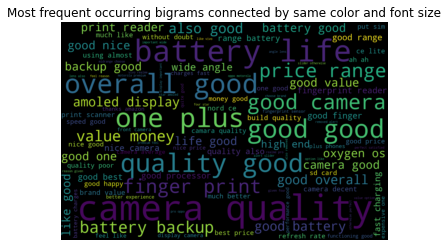

In [38]:
plt.figure()
plt.title('Most frequent occurring bigrams connected by same color and font size')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()